In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.

In [5]:
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [6]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape) 
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape) 

In [7]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

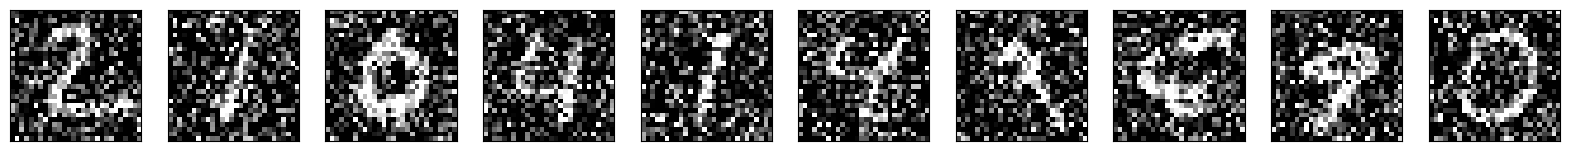

In [8]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
input_img = keras.Input(shape=(28, 28, 1))

x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
x=layers.MaxPooling2D((2, 2), padding='same')(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)

decoded = layers.Conv2D(1, (3, 3), activation='sigmoid',padding='same')(x)

autoencoder = keras.Model(input_img, decoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

In [24]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=50,
                batch_size=250,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/50
240/240 [==============================] - 6s 10ms/step - loss: 0.1023 - val_loss: 0.1002
Epoch 2/50
240/240 [==============================] - 2s 9ms/step - loss: 0.1009 - val_loss: 0.1000
Epoch 3/50
240/240 [==============================] - 2s 9ms/step - loss: 0.1003 - val_loss: 0.0991
Epoch 4/50
240/240 [==============================] - 2s 9ms/step - loss: 0.0997 - val_loss: 0.0987
Epoch 5/50
240/240 [==============================] - 2s 10ms/step - loss: 0.0993 - val_loss: 0.0981
Epoch 6/50
240/240 [==============================] - 2s 9ms/step - loss: 0.0988 - val_loss: 0.0978
Epoch 7/50
240/240 [==============================] - 2s 9ms/step - loss: 0.0985 - val_loss: 0.0975
Epoch 8/50
240/240 [==============================] - 2s 9ms/step - loss: 0.0981 - val_loss: 0.0972
Epoch 9/50
240/240 [==============================] - 2s 9ms/step - loss: 0.0979 - val_loss: 0.0969
Epoch 10/50
240/240 [==============================] - 2s 9ms/step - loss: 0.0976 - val_loss: 0.09

In [25]:
metrics = pd.DataFrame(autoencoder.history.history)

<Axes: >

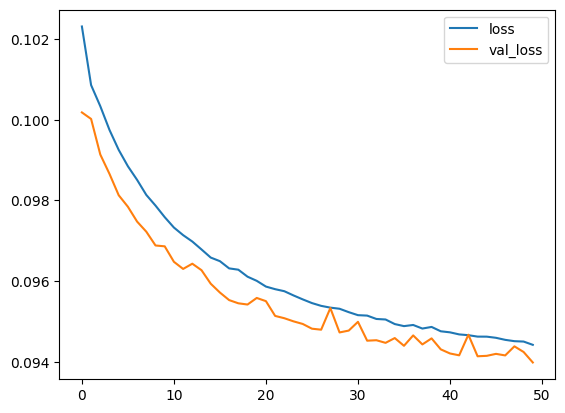

In [26]:
metrics[['loss','val_loss']].plot()

In [27]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


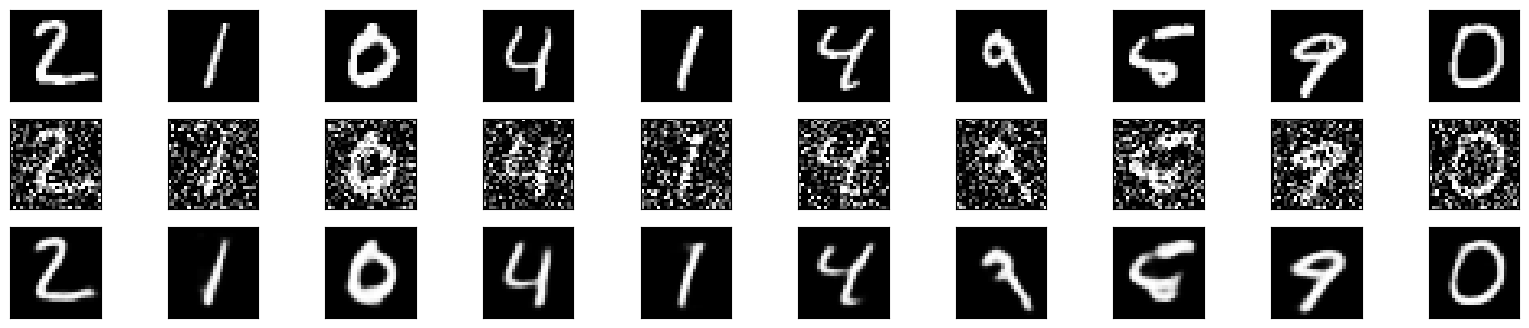

In [28]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()